In [1]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
import re
import pylab as pl
pd.set_option('display.max_columns', None)

Findings:

All seasons have the same 34 columns.

Seasons 2000-01 - 2003-04 had 82 games each for 29 teams: 82*29*0.5 = 1189 games played
Seasons 2004-05 - 2010-11 had 82 games each for 30 teams: 82*30*0.5 = 1230 games played
Season 2011-12 had 66 games each for 30 teams: 66*30*0.5 = 990 games played
Season 2012-13 had 82 games each for 30 teams: 82*30*0.5 - 1 = 1229 (One game cancelled due to Boston Marathon bombing)
Seasons 2013-14 - 2018-19 had 82 games each for 30 teams: 82*30*0.5 = 1230 games played

Columns:
NEUTRALDESCRIPTION never contains information


In [2]:
seasons = data_loader.load_data()

In [66]:
seasons[seasons['GAME_ID']==20000001]

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,season_name,time
418371,0,0,PERIOD_BEGIN,0,20000001,NaN,12:00,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:13 PM,2000-01,1900-01-01 12:13:00
418372,1,0,JUMP_BALL,1,20000001,Jump Ball Camby vs. Ratliff: Tip to Houston,12:00,1,HOME_PLAYER,VISITOR_PLAYER,HOME_PLAYER,948,Marcus Camby,NYK,New York,1610612752.0,Knicks,689,Theo Ratliff,PHI,Philadelphia,1610612755.0,76ers,275,Allan Houston,NYK,New York,1610612752.0,Knicks,NaN,NaN,NaN,12:13 PM,2000-01,1900-01-01 12:13:00
418373,2,Jump Shot,FIELD_GOAL_MISSED,2,20000001,MISS Sprewell 6' Jump Shot,11:41,1,HOME_PLAYER,0,VISITOR_PLAYER,84,Latrell Sprewell,NYK,New York,1610612752.0,Knicks,0,NaN,NaN,NaN,NaN,NaN,689,Theo Ratliff,PHI,Philadelphia,1610612755.0,76ers,NaN,NaN,Ratliff BLOCK (1 BLK),12:14 PM,2000-01,1900-01-01 12:14:00
418374,3,live,REBOUND,3,20000001,NaN,11:40,1,VISITOR_TEAM,0,0,1610612755,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76ers Rebound,12:14 PM,2000-01,1900-01-01 12:14:00
418375,4,2,FOUL,4,20000001,Camby S.FOUL (P1.T1),11:29,1,HOME_PLAYER,0,TIMEOUT,948,Marcus Camby,NYK,New York,1610612752.0,Knicks,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:14 PM,2000-01,1900-01-01 12:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418795,424,Jump Shot,FIELD_GOAL_MADE,462,20000001,Strickland 26' 3PT Jump Shot (10 PTS) (Postell...,0:43,4,HOME_PLAYER,HOME_PLAYER,0,1065,Erick Strickland,NYK,New York,1610612752.0,Knicks,2068,Lavor Postell,NYK,New York,1610612752.0,Knicks,0,NaN,NaN,NaN,NaN,NaN,99 - 72,-27,NaN,2:35 PM,2000-01,1900-01-01 02:35:00
418796,425,Jump Shot,FIELD_GOAL_MADE,463,20000001,NaN,0:29,4,VISITOR_PLAYER,VISITOR_PLAYER,0,1928,Todd MacCulloch,PHI,Philadelphia,1610612755.0,76ers,2143,Juan Sanchez,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,101 - 72,-29,MacCulloch 10' Jump Shot (7 PTS) (Sanchez 2 AST),2:35 PM,2000-01,1900-01-01 02:35:00
418797,426,Jump Shot,FIELD_GOAL_MISSED,464,20000001,MISS Knight 21' Jump Shot,0:09,4,HOME_PLAYER,0,0,969,Travis Knight,NYK,New York,1610612752.0,Knicks,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:35 PM,2000-01,1900-01-01 02:35:00
418798,427,live,REBOUND,465,20000001,NaN,0:07,4,VISITOR_PLAYER,0,0,1928,Todd MacCulloch,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MacCulloch REBOUND (Off:0 Def:2),2:35 PM,2000-01,1900-01-01 02:35:00


In [69]:
g = seasons.groupby('GAME_ID')

start_end_time = (pd.concat([g.head(1), g.tail(1)])
   .drop_duplicates()
   .sort_values('GAME_ID')
   .reset_index(drop=True))[["GAME_ID","WCTIMESTRING","time","season_name"]]

In [68]:
seasons["time"] = pd.to_datetime(seasons['WCTIMESTRING'],format= '%I:%M %p' , errors='coerce')

In [75]:
start_end_time[start_end_time["time"].isna()==False].groupby("GAME_ID")["time"].agg(["min","max"]).diff(axis=1)

,min,max
GAME_ID,,
20000001,NaT,0 days 02:23:00
20000002,NaT,0 days 02:21:00
20000003,NaT,0 days 02:18:00
20000004,NaT,0 days 02:16:00
20000005,NaT,0 days 00:00:00
...,...,...
21801226,NaT,0 days 02:00:00
21801227,NaT,0 days 02:02:00
21801228,NaT,0 days 21:54:00


In [54]:
seasons[seasons["GAME_ID"]==20001116].iloc[170:180]

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,season_name,time
170,170,Jump Shot,FIELD_GOAL_MISSED,177,20001116,NaN,2:39,2,VISITOR_PLAYER,0,0,727,Eric Snow,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Snow 15' Jump Shot,12:59 PM,2000-01,1900-01-01 12:59:00
171,171,live,REBOUND,178,20001116,Mason REBOUND (Off:0 Def:6),2:37,2,HOME_PLAYER,0,0,193,Anthony Mason,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:59 PM,2000-01,1900-01-01 12:59:00
172,172,Hook Shot,FIELD_GOAL_MISSED,179,20001116,MISS Mourning 6' Hook Shot,2:29,2,HOME_PLAYER,0,0,297,Alonzo Mourning,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:59 PM,2000-01,1900-01-01 12:59:00
173,173,live,REBOUND,180,20001116,NaN,2:27,2,VISITOR_PLAYER,0,0,1908,Jumaine Jones,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jones REBOUND (Off:1 Def:2),12:59 PM,2000-01,1900-01-01 12:59:00
174,174,1,FOUL,181,20001116,Mason P.FOUL (P1.T3),2:16,2,HOME_PLAYER,0,TIMEOUT,193,Anthony Mason,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00 PM,2000-01,1900-01-01 01:00:00
175,175,0,SUBSTITUTION,182,20001116,SUB: Majerle FOR Grant,2:16,2,HOME_PLAYER,HOME_PLAYER,0,258,Brian Grant,MIA,Miami,1610612748.0,Heat,105,Dan Majerle,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00 PM,2000-01,1900-01-01 01:00:00
176,176,Layup,FIELD_GOAL_MADE,183,20001116,NaN,2:10,2,VISITOR_PLAYER,VISITOR_PLAYER,0,238,Tyrone Hill,PHI,Philadelphia,1610612755.0,76ers,727,Eric Snow,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,31 - 35,4,Hill Layup (2 PTS) (Snow 4 AST),1:00 PM,2000-01,1900-01-01 01:00:00
177,177,2,FOUL,184,20001116,Mourning S.FOUL (P1.T4),2:10,2,HOME_PLAYER,0,TIMEOUT,297,Alonzo Mourning,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00 PM,2000-01,1900-01-01 01:00:00
178,178,Free Throw 1 of 1,FREE_THROW,185,20001116,NaN,2:10,2,VISITOR_PLAYER,0,0,238,Tyrone Hill,PHI,Philadelphia,1610612755.0,76ers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,32 - 35,3,Hill Free Throw 1 of 1 (3 PTS),1:00 PM,2000-01,1900-01-01 01:00:00
179,179,Jump Shot,FIELD_GOAL_MADE,186,20001116,Majerle 24' 3PT Jump Shot (3 PTS) (Mourning 2 ...,1:52,2,HOME_PLAYER,HOME_PLAYER,0,105,Dan Majerle,MIA,Miami,1610612748.0,Heat,297,Alonzo Mourning,MIA,Miami,1610612748.0,Heat,0,NaN,NaN,NaN,NaN,NaN,32 - 38,6,NaN,1:01 PM,2000-01,1900-01-01 01:01:00


In [6]:
per_season_stats = {}
per_season_stats['games_played'] = seasons.groupby("season_name")['GAME_ID'].nunique()
per_season_stats['nr_teams'] = seasons.groupby("season_name")['PLAYER1_TEAM_ABBREVIATION'].nunique()
per_season_stats['games_per_team'] = round(per_season_stats['games_played'] / per_season_stats['nr_teams'] * 2).astype(int)
per_season_stats["nr_of_eventtype"] = seasons.groupby("season_name")['EVENTMSGTYPE'].nunique()
#Per game and team:
per_season_stats['mean_nr_plays_per_game'] = round(seasons.groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2, 2)
per_season_stats["points_scored_per_game"] = round(seasons.groupby(["season_name","GAME_ID"])["SCORE"].last().apply(lambda score: sum([int(i) for i in score.split() if i.isdigit()])).groupby(level = "season_name").mean() / 2)
per_season_stats["field_goals_made_per_game"] = round(seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2, 2)
per_season_stats["field_goals_attempted_per_game"] = round(per_season_stats["field_goals_made_per_game"] + seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MISSED"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2, 2)
per_season_stats["field_goal_percent"] = round(per_season_stats["field_goals_made_per_game"] / per_season_stats["field_goals_attempted_per_game"],4 )
per_season_stats["nr_of_field_goal_types"] = seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE"].groupby("season_name")['EVENTMSGACTIONTYPE'].nunique()
per_season_stats["fouls_per_game"] = round(seasons[seasons["EVENTMSGTYPE"]=="FOUL"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2, 2)
per_season_stats = pd.DataFrame(per_season_stats)
per_season_stats

,games_played,nr_teams,games_per_team,nr_of_eventtype,mean_nr_plays_per_game,points_scored_per_game,field_goals_made_per_game,field_goals_attempted_per_game,field_goal_percent,nr_of_field_goal_types,fouls_per_game
season_name,,,,,,,,,,,
2000-01,1189,29,82,13,225.89,95.0,35.69,80.60,0.4428,25,23.19
2001-02,1189,29,82,13,222.97,95.0,36.17,81.27,0.4451,27,22.13
2002-03,1189,29,82,13,224.28,95.0,35.72,80.79,0.4421,27,22.64
2003-04,1189,29,82,14,223.27,93.0,35.01,79.82,0.4386,29,22.20
2004-05,1230,30,82,14,227.27,97.0,35.95,80.34,0.4475,29,23.40
2005-06,1230,30,82,14,225.25,97.0,35.84,78.99,0.4537,29,23.55
2006-07,1230,30,82,14,226.30,99.0,36.53,79.71,0.4583,29,23.12
2007-08,1230,30,82,14,224.02,100.0,37.26,81.50,0.4572,50,21.74
2008-09,1230,30,82,14,222.14,100.0,37.12,80.92,0.4587,49,21.78


In [8]:
seasons.groupby("GAME_ID").size().mean()

452.41693881994337

Text(0.5, 0, 'Nr. of plays/events')

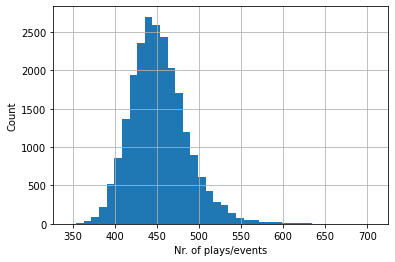

In [12]:
ax = seasons.groupby("GAME_ID").size().hist(bins=40)
ax.set_ylabel("Count")
ax.set_xlabel("Nr. of plays/events")

Text(0, 0.5, 'Count')

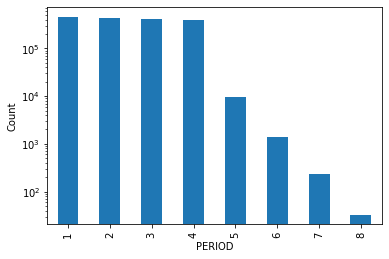

In [4]:
seasons[(seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE")].groupby("PERIOD").size().plot.bar(logy=True)
#pl.title("Histogram of Ages")
pl.xlabel("PERIOD")
pl.ylabel("Count")

In [4]:
seasons = seasons[(seasons["EVENTMSGTYPE"]=="TURNOVER")][["EVENTMSGACTIONTYPE","HOMEDESCRIPTION","VISITORDESCRIPTION","PLAYER1_NAME","PLAYER2_NAME","EVENTNUM","season_name","GAME_ID"]]

In [5]:
seasons.groupby("EVENTMSGACTIONTYPE")["EVENTNUM"].count()

EVENTMSGACTIONTYPE
0        473
1     275411
2     137370
3       2406
4      44830
5      77885
6       1793
7       2655
8      11942
9        293
10       555
11     26806
12       546
13      2948
14        92
15      2810
16         7
17       683
18        96
19       387
20       141
21      2605
22        16
23        30
31        17
32         4
33        17
34        16
35        23
36       513
37      8954
38       413
39     10682
40     28088
41      8139
42        11
43        22
44         4
45     14633
52         1
Name: EVENTNUM, dtype: int64

In [4]:
seasons[seasons["EVENTMSGACTIONTYPE"].isin([0,1])].tail(35)

,EVENTMSGACTIONTYPE,HOMEDESCRIPTION,VISITORDESCRIPTION,PLAYER1_NAME,PLAYER2_NAME,EVENTNUM,season_name,GAME_ID
10389590,0,Harris REBOUND (Off:0 Def:1),NaN,Devin Harris,NaN,398,2018-19,21801037
10389592,0,Kleber REBOUND (Off:3 Def:3),NaN,Maxi Kleber,NaN,400,2018-19,21801037
10389594,0,NaN,Chriss REBOUND (Off:1 Def:1),Marquese Chriss,NaN,402,2018-19,21801037
10389608,0,Kleber REBOUND (Off:4 Def:3),NaN,Maxi Kleber,NaN,421,2018-19,21801037
10389610,0,NaN,Clarkson REBOUND (Off:0 Def:1),Jordan Clarkson,NaN,423,2018-19,21801037
10389615,0,MAVERICKS Rebound,NaN,NaN,NaN,430,2018-19,21801037
10389625,0,Jackson REBOUND (Off:0 Def:3),NaN,Justin Jackson,NaN,444,2018-19,21801037
10389629,0,Kleber REBOUND (Off:4 Def:4),NaN,Maxi Kleber,NaN,456,2018-19,21801037
10389631,0,NaN,Cavaliers Rebound,NaN,NaN,458,2018-19,21801037
10389633,0,Kleber REBOUND (Off:4 Def:5),NaN,Maxi Kleber,NaN,461,2018-19,21801037


In [203]:
seasons["shot_types"] = seasons.apply(lambda play: resolve_description(str(play["HOMEDESCRIPTION"]), play["PLAYER1_NAME"], play["PLAYER2_NAME"])["shot_type"] if isinstance(play["HOMEDESCRIPTION"], str) else resolve_description(str(play["VISITORDESCRIPTION"]), play["PLAYER1_NAME"], play["PLAYER2_NAME"])["shot_type"], axis=1)

In [228]:
#seasons.groupby(["EVENTMSGACTIONTYPE","shot_types"])["shot_types"].count().idxmax()
presumed_shot_types = seasons.groupby(["EVENTMSGACTIONTYPE","shot_types"])["EVENTNUM"].count().loc[seasons.groupby(["EVENTMSGACTIONTYPE","shot_types"])["EVENTNUM"].count().groupby(level = "EVENTMSGACTIONTYPE").idxmax()]
presumed_shot_types = presumed_shot_types.reset_index()

In [227]:
presumed_shot_types[presumed_shot_types["shot_types"].isin([])]

,EVENTMSGACTIONTYPE,shot_types,EVENTNUM
0,0,No Shot,49
1,1,Jump Shot,699475
2,2,Running Jump Shot,1174
3,3,Hook Shot,31002
4,4,Tip Shot,27259
...,...,...,...
73,106,Running Alley Oop Dunk Shot,505
74,107,Tip Dunk Shot,1395
75,108,Cutting Dunk Shot,8919
76,109,Driving Reverse Dunk Shot,146


In [ ]:
pd.Series(presumed_shot_types.reset_index().shot_types.values, index = presumed_shot_types.reset_index().EVENTMSGACTIONTYPE).to_dict()

In [206]:
(presumed_shot_types['EVENTNUM'] / total_counts['EVENTNUM']).sort_values().head(20)

EVENTMSGACTIONTYPE  shot_types                 
7                   Dunk                           0.988886
87                  Putback Dunk                   0.989319
62                  Turnaround Finger Roll         0.990196
64                  Follow Up Dunk                 0.991561
49                  Driving Dunk                   0.991625
106                 Running Alley Oop Dunk Shot    0.992141
59                  Finger Roll                    0.992374
48                  Dunk                           0.992877
88                  Driving Slam Dunk              0.993274
108                 Cutting Dunk Shot              0.993539
50                  Running Dunk                   0.993653
5                   Layup                          0.994279
8                   Slam Dunk                      0.994521
4                   Tip Shot                       0.994673
52                  Alley Oop Dunk                 0.994678
60                  Running Finger Roll            0

In [194]:
def remove_player1(a, b):
    if isinstance(a, float):
        print(a, b)
    return b[max(i for i in range(len(b)+1) if str(a).endswith(b[:i]))+1:]

def resolve_description(description, player1, player2):
    # The last name of the player shooting is removed.
    description_rest = remove_player1(player1, description)
    #Check for 3PT
    three_pointer = "3PT" in description_rest
    if three_pointer:
        description_rest = description_rest.replace("3PT","")
    # The type of shot is everything before the first " (".
    shot_type_regex = re.compile("^.*?(?=(\s\())")
    shot_type = shot_type_regex.search(description_rest)
    if shot_type==None:
        print(description)
    description_rest = description_rest[shot_type.end(0)+1:]
    shot_type_long = shot_type.group(0)
    #Some shots have distance: Can be extracted before '
    shot_type_split = shot_type_long.split("'")
    distance = shot_type_split[0] if len(shot_type_split)>1 else None
    shot_type_short = shot_type_split[1].strip() if len(shot_type_split)>1 else shot_type_split[0].strip()
    #Splitting at space to extract remaining info (Points tally and possible assist giver).
    split_description_rest = description_rest.split()
    return {
    "shooter" : player1,
    "shot_type" : shot_type_short,
    "three_pointer": three_pointer,
    "distance" : distance,
    "points_total" : split_description_rest[0].replace("(",""),
    "assist_giver" : split_description_rest[2].replace("(","") if len(split_description_rest)>2 else None,
    "assist_total" : split_description_rest[3] if len(split_description_rest)>3 else None,
    }
    

resolve_description("Van Horn Layup (3 PTS) (Marbury 1 AST)", "Keith Van Horn", "Stephon Marbury")

{'shooter': 'Keith Van Horn',
 'shot_type': 'Layup',
 'three_pointer': False,
 'distance': None,
 'points_total': '3',
 'assist_giver': 'Marbury',
 'assist_total': '1'}

In [81]:
resolve_description()

TypeError: resolve_description() takes 3 positional arguments but 4 were given